# Data Preparation of DR16Q Superset Catalogue

> The superset contains 1,440,615 observations of
> quasars, stars, and galaxies that were all targeted as
> quasars (or appeared in previous quasar catalogs).

In [1]:
from functools import reduce

from astropy.io import fits
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with fits.open("data/DR16Q_Superset_v3.fits") as hdul:
    data = hdul[1].data.byteswap().newbyteorder().copy()
    superset = pd.DataFrame()
    for col in [
        "PLATE", "MJD", "FIBERID",
        "IS_QSO_QN", "Z_QN",
        "RANDOM_SELECT", "Z_10K", "Z_CONF_10K", "PIPE_CORR_10K", "IS_QSO_10K",
        "Z_VI", "Z_CONF", "CLASS_PERSON", "IS_QSO_FINAL", "Z", "SOURCE_Z", "Z_PIPE", "ZWARNING",
        "Z_PCA", "ZWARN_PCA",
        
    ]:
        superset[col] = data[col]
superset.info()
superset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440615 entries, 0 to 1440614
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   PLATE          1440615 non-null  int32  
 1   MJD            1440615 non-null  int32  
 2   FIBERID        1440615 non-null  int16  
 3   IS_QSO_QN      1440615 non-null  int16  
 4   Z_QN           1440615 non-null  float64
 5   RANDOM_SELECT  1440615 non-null  int16  
 6   Z_10K          1440615 non-null  float64
 7   Z_CONF_10K     1440615 non-null  int16  
 8   PIPE_CORR_10K  1440615 non-null  int16  
 9   IS_QSO_10K     1440615 non-null  int16  
 10  Z_VI           1440615 non-null  float64
 11  Z_CONF         1440615 non-null  int16  
 12  CLASS_PERSON   1440615 non-null  int16  
 13  IS_QSO_FINAL   1440615 non-null  int16  
 14  Z              1440615 non-null  float64
 15  SOURCE_Z       1440615 non-null  object 
 16  Z_PIPE         1440615 non-null  float64
 17  ZWARNING

,PLATE,MJD,FIBERID,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,Z_VI,Z_CONF,CLASS_PERSON,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA
0,11279,58449,85,0,2.029856,0,-1.0,-1,-1,-1,-1.0,0,0,0,-0.000722,PIPE,-0.000722,0,-0.001039,0
1,8740,57367,666,0,2.052055,0,-1.0,-1,-1,-1,-1.0,0,0,0,-0.000685,PIPE,-0.000685,0,-0.001260,0
2,7695,57654,574,0,2.120619,0,-1.0,-1,-1,-1,-1.0,0,0,0,-0.000839,PIPE,-0.000839,0,-0.000694,0
3,7850,56956,302,0,1.282475,0,-1.0,-1,-1,-1,-1.0,0,0,0,-0.000058,PIPE,-0.000058,0,0.033841,32
4,7750,58402,802,1,0.844138,0,-1.0,-1,-1,-1,-1.0,0,0,1,0.845435,PIPE,0.845435,0,0.845751,0


> For objects that have a redshift in the columns `Z_VI` or `Z_10K` and a confidence (`Z_CONF` or `Z_CONF_10K`) of ≥ 2,
> `Z` records the corresponding redshift and `SOURCE_Z` is set to `VI`. Otherwise, if an object has a redshift in the
> columns `Z_DR6Q_HW` or `Z_DR7Q_SCH` these values are used (with `Z_DR6Q_HW` overriding `Z_DR7Q_SCH`) and `SOURCE_Z` is
> set to `DR6Q_HW` or `DR7QV_SCH`. As the `ZDR7Q_HW` redshifts did not formally appear in the Shen et al. (2011) paper,
> these values are not used to populate the `Z` column.
> If no other visual inspection redshift is populated then `Z_DR12Q` is used (and `SOURCE_Z` is set to `DR12QV`).
> For objects with DR12Q redshifts, only the visual inspection redshifts are recorded; DR12Q pipeline redshifts
> are not included. In the absence of any of these visual
> inspection redshifts, `Z` is populated with the automated pipeline redshift (and `SOURCE_Z` is set to `PIPE`).

In [3]:
source_idx = superset["SOURCE_Z"] != "PIPE"
gt_zero_idx = superset["Z"] > 0
eq_zero_idx = superset["Z"] == 0
source_idx.sum(), gt_zero_idx.sum(), eq_zero_idx.sum()

(541608, 1234103, 1)

In [4]:
source_subset = superset[source_idx & (gt_zero_idx | eq_zero_idx)]
source_subset

,PLATE,MJD,FIBERID,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,Z_VI,Z_CONF,CLASS_PERSON,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA
15,6173,56238,528,1,2.311340,0,-1.0,-1,-1,-1,2.309,3,3,1,2.309,VI,2.308180,0,2.309822,0
16,7596,56945,162,1,2.309355,0,-1.0,-1,-1,-1,2.309,3,3,1,2.309,VI,2.307397,0,2.304973,0
19,4216,55477,310,-1,-1.000000,0,-1.0,-1,-1,-1,0.250,3,3,1,0.250,VI,0.249938,0,0.249966,0
27,6172,56269,366,1,2.498696,0,-1.0,-1,-1,-1,2.497,3,3,1,2.497,VI,2.499653,0,2.495232,0
28,6177,56268,595,1,2.511271,0,-1.0,-1,-1,-1,2.497,3,3,1,2.497,VI,2.497960,0,2.495101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440606,7696,57655,120,1,2.443098,0,-1.0,-1,-1,-1,2.452,3,3,1,2.452,VI,2.450069,0,2.447448,0
1440607,6511,56540,912,1,2.451875,0,-1.0,-1,-1,-1,2.452,3,3,1,2.452,VI,2.450900,0,2.447449,0
1440608,7134,56566,408,1,2.452158,0,-1.0,-1,-1,-1,2.452,3,3,1,2.452,VI,2.449493,0,2.447442,0
1440610,7145,56567,240,1,3.095621,0,-1.0,-1,-1,-1,3.109,3,3,1,3.109,VI,3.114191,0,3.106480,0


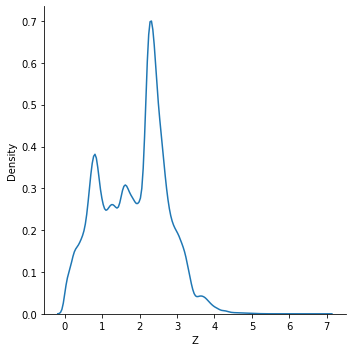

In [5]:
sns.displot(data=source_subset, x="Z", kind="kde")

## Wavelength Range

In [6]:
with fits.open("data/specObj-dr16.fits") as hdul:
    data = hdul[1].data.byteswap().newbyteorder().copy()
    specobj = pd.DataFrame()
    for col in ["PLATE", "MJD", "FIBERID", "WAVEMIN", "WAVEMAX", "WCOVERAGE", "RUN2D"]:
        specobj[col] = data[col]
specobj.head()

,PLATE,MJD,FIBERID,WAVEMIN,WAVEMAX,WCOVERAGE,RUN2D
0,266,51602,1,3806.273682,9202.376953,0.3777,26
1,266,51602,2,3806.273682,9202.376953,0.3788,26
2,266,51602,3,3806.273682,9202.376953,0.3763,26
3,266,51602,4,3806.273682,9202.376953,0.3770,26
4,266,51602,5,3805.397217,9202.376953,0.3766,26


In [7]:
wave_subset = pd.merge(source_subset, specobj, on=["PLATE", "MJD", "FIBERID"], how="left")
wave_subset

,PLATE,MJD,FIBERID,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,...,Z,SOURCE_Z,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,WAVEMIN,WAVEMAX,WCOVERAGE,RUN2D
0,6173,56238,528,1,2.311340,0,-1.0,-1,-1,-1,...,2.309,VI,2.308180,0,2.309822,0,3603.296387,10360.959961,0.4538,v5_13_0
1,7596,56945,162,1,2.309355,0,-1.0,-1,-1,-1,...,2.309,VI,2.307397,0,2.304973,0,3601.637451,10341.891602,0.4493,v5_13_0
2,4216,55477,310,-1,-1.000000,0,-1.0,-1,-1,-1,...,0.250,VI,0.249938,0,0.249966,0,3601.637451,10299.117188,0.4479,v5_13_0
3,6172,56269,366,1,2.498696,0,-1.0,-1,-1,-1,...,2.497,VI,2.499653,0,2.495232,0,3601.637451,10339.510742,0.4521,v5_13_0
4,6177,56268,595,1,2.511271,0,-1.0,-1,-1,-1,...,2.497,VI,2.497960,0,2.495101,0,3605.786377,10363.345703,0.4483,v5_13_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541187,7696,57655,120,1,2.443098,0,-1.0,-1,-1,-1,...,2.452,VI,2.450069,0,2.447448,0,3601.637451,10337.130859,0.4477,v5_13_0
541188,6511,56540,912,1,2.451875,0,-1.0,-1,-1,-1,...,2.452,VI,2.450900,0,2.447449,0,3611.603027,10356.189453,0.4507,v5_13_0
541189,7134,56566,408,1,2.452158,0,-1.0,-1,-1,-1,...,2.452,VI,2.449493,0,2.447442,0,3601.637451,10341.891602,0.4500,v5_13_0
541190,7145,56567,240,1,3.095621,0,-1.0,-1,-1,-1,...,3.109,VI,3.114191,0,3.106480,0,3601.637451,10337.130859,0.4505,v5_13_0


<AxesSubplot:>

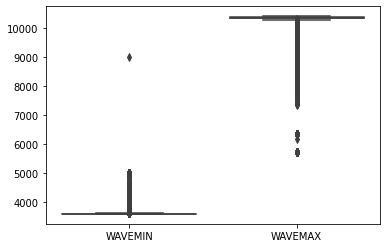

In [8]:
sns.boxplot(data=wave_subset[["WAVEMIN", "WAVEMAX"]])

In [9]:
wave_subset[["WAVEMIN", "WAVEMAX", "WCOVERAGE"]].describe()

,WAVEMIN,WAVEMAX,WCOVERAGE
count,541150.000000,541150.000000,541150.000000
mean,3631.854980,10189.990234,0.436704
std,73.104118,399.720306,0.027420
min,3601.637451,5727.960449,0.013900
25%,3601.637451,10327.614258,0.440000
50%,3601.637451,10341.891602,0.447600
75%,3608.278076,10360.959961,0.451600
max,8986.695312,10396.807617,0.459400


In [10]:
wavemin = wave_subset["WAVEMIN"].quantile(0.95)
wavemax = wave_subset["WAVEMAX"].quantile(0.05)
wavemin, wavemax, np.log10(wavemin), np.log10(wavemax)

(3812.4136, 9198.14, 3.5812001, 3.9637)

In [11]:
LOGWAVEMIN, LOGWAVEMAX = 3.5812, 3.9637

In [12]:
wave_idx = (wave_subset["WAVEMIN"] < wavemin) & (wave_subset["WAVEMAX"] > wavemax)
wave_idx.sum()

493516

In [13]:
final_subset = wave_subset[wave_idx]
final_subset

,PLATE,MJD,FIBERID,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,...,Z,SOURCE_Z,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,WAVEMIN,WAVEMAX,WCOVERAGE,RUN2D
0,6173,56238,528,1,2.311340,0,-1.0,-1,-1,-1,...,2.309,VI,2.308180,0,2.309822,0,3603.296387,10360.959961,0.4538,v5_13_0
1,7596,56945,162,1,2.309355,0,-1.0,-1,-1,-1,...,2.309,VI,2.307397,0,2.304973,0,3601.637451,10341.891602,0.4493,v5_13_0
2,4216,55477,310,-1,-1.000000,0,-1.0,-1,-1,-1,...,0.250,VI,0.249938,0,0.249966,0,3601.637451,10299.117188,0.4479,v5_13_0
3,6172,56269,366,1,2.498696,0,-1.0,-1,-1,-1,...,2.497,VI,2.499653,0,2.495232,0,3601.637451,10339.510742,0.4521,v5_13_0
4,6177,56268,595,1,2.511271,0,-1.0,-1,-1,-1,...,2.497,VI,2.497960,0,2.495101,0,3605.786377,10363.345703,0.4483,v5_13_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541187,7696,57655,120,1,2.443098,0,-1.0,-1,-1,-1,...,2.452,VI,2.450069,0,2.447448,0,3601.637451,10337.130859,0.4477,v5_13_0
541188,6511,56540,912,1,2.451875,0,-1.0,-1,-1,-1,...,2.452,VI,2.450900,0,2.447449,0,3611.603027,10356.189453,0.4507,v5_13_0
541189,7134,56566,408,1,2.452158,0,-1.0,-1,-1,-1,...,2.452,VI,2.449493,0,2.447442,0,3601.637451,10341.891602,0.4500,v5_13_0
541190,7145,56567,240,1,3.095621,0,-1.0,-1,-1,-1,...,3.109,VI,3.114191,0,3.106480,0,3601.637451,10337.130859,0.4505,v5_13_0


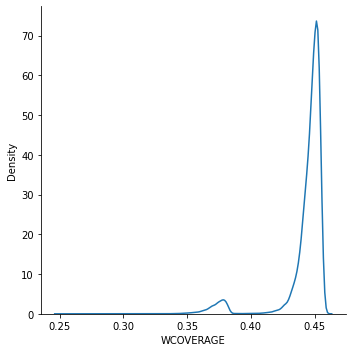

In [14]:
sns.displot(data=final_subset, x="WCOVERAGE", kind="kde")

## Filepaths

In [15]:
final_subset[["PLATE", "MJD", "FIBERID"]].describe()

,PLATE,MJD,FIBERID
count,493516.000000,493516.000000,493516.000000
mean,5830.711031,56142.609464,492.401610
std,1757.628871,1028.782782,287.220172
min,266.000000,51608.000000,1.000000
25%,4648.000000,55706.000000,245.000000
50%,6053.000000,56246.000000,486.000000
75%,7307.000000,56710.000000,738.000000
max,11704.000000,58543.000000,1000.000000


In [16]:
plate = final_subset["PLATE"].values.astype("U")
idx = np.char.str_len(plate) <= 3
plate[idx] = np.char.rjust(plate[idx], 4, "0")
mjd = final_subset["MJD"].values.astype("U")
fiberid = np.char.rjust(final_subset["FIBERID"].values.astype("U"), 4, "0")
speclist = reduce(np.char.add, [plate, "/spec-", plate, "-", mjd, "-", fiberid, ".fits"])
speclist

array(['6173/spec-6173-56238-0528.fits', '7596/spec-7596-56945-0162.fits',
       '4216/spec-4216-55477-0310.fits', ...,
       '7134/spec-7134-56566-0408.fits', '7145/spec-7145-56567-0240.fits',
       '7145/spec-7145-56567-0262.fits'], dtype='<U50')

In [17]:
np.savetxt("speclist.lst", speclist, fmt="%s")

## Preview

In [18]:
rnd_idx = np.random.randint(len(speclist))

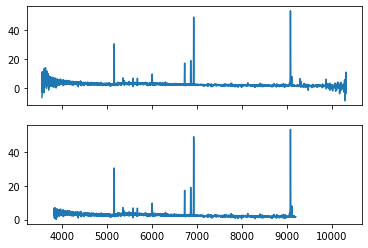

In [19]:
filepath = "data/DR16Q_Superset_v3/" + speclist[rnd_idx]
with fits.open(filepath) as hdul:
    data = hdul[1].data
    fig, ax = plt.subplots(nrows=2, sharex=True)
    loglam = data["loglam"]
    lam = np.power(10, loglam)
    ax[0].plot(lam, data["flux"])
    lam_idx = (LOGWAVEMIN <= loglam) & (loglam <= LOGWAVEMAX)
    ax[1].plot(lam[lam_idx], data["flux"][lam_idx])

In [20]:
idx = (LOGWAVEMIN <= loglam) & (loglam <= LOGWAVEMAX)
n_waves = idx.sum()
n_waves

3826

## HDF5

In [21]:
ID_DTYPE = [("plate", np.int), ("mjd", np.int), ("fiberid", np.int)]
ids = np.zeros(len(final_subset["PLATE"]), dtype=ID_DTYPE)
ids["plate"], ids["mjd"], ids["fiberid"] = plate, mjd, fiberid

with h5py.File("dr16q_superset.hdf5", "x") as datafile:
    ids_dset = datafile.create_dataset("id", data=ids)
    z_dset   = datafile.create_dataset("z", data=final_subset["Z"])